### **Importing necessary libraries**

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

### **Importing the data**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/ML_Project/merged_usa_dataset.csv")
df.head()

,Entity,Year,Renewables (% electricity),Renewables (% equivalent primary energy),Biofuels Production - TWh - Total,Solar (% electricity),Hydro (% equivalent primary energy),Electricity from hydro (TWh),Electricity from wind (TWh),Hydro (% electricity),...,Electricity from solar (TWh),Other renewables including bioenergy (TWh),Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Geothermal Capacity,Wind (% equivalent primary energy),Wind Capacity,Solar (% equivalent primary energy)
0,United States,1965,0.0,4.368870,0.0,0.0,4.074629,397.94818,0.0,0.0,...,0.0,13.332232,13.332232,0.0,0.0,198.97409,0.0,0.0,0.0,0.0
1,United States,1966,0.0,4.171402,0.0,0.0,3.877466,399.87380,0.0,0.0,...,0.0,14.062007,14.062007,0.0,0.0,199.93690,0.0,0.0,0.0,0.0
2,United States,1967,0.0,4.542216,0.0,0.0,4.258249,454.44162,0.0,0.0,...,0.0,14.073571,14.073571,0.0,0.0,227.22081,0.0,0.0,0.0,0.0
3,United States,1968,0.0,4.330974,0.0,0.0,4.035142,456.30942,0.0,0.0,...,0.0,15.546045,15.546045,0.0,0.0,228.15471,0.0,0.0,0.0,0.0
4,United States,1969,0.0,4.598878,0.0,0.0,4.305610,512.05706,0.0,0.0,...,0.0,16.227060,16.227060,0.0,0.0,256.02853,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      57 non-null     object 
 1   Year                                        57 non-null     int64  
 2   Renewables (% electricity)                  57 non-null     float64
 3   Renewables (% equivalent primary energy)    57 non-null     float64
 4   Biofuels Production - TWh - Total           57 non-null     float64
 5   Solar (% electricity)                       57 non-null     float64
 6   Hydro (% equivalent primary energy)         57 non-null     float64
 7   Electricity from hydro (TWh)                57 non-null     float64
 8   Electricity from wind (TWh)                 57 non-null     float64
 9   Hydro (% electricity)                       57 non-null     float64
 10  Wind (% electric

### **Data Preparation:**

##### **Dropping the Entity column as it's all United States and it isn't really required to perform analysis**

In [4]:
df_usa = df.drop(['Entity'], axis=1)

In [5]:
df_usa.head()

,Year,Renewables (% electricity),Renewables (% equivalent primary energy),Biofuels Production - TWh - Total,Solar (% electricity),Hydro (% equivalent primary energy),Electricity from hydro (TWh),Electricity from wind (TWh),Hydro (% electricity),Wind (% electricity),...,Electricity from solar (TWh),Other renewables including bioenergy (TWh),Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Geothermal Capacity,Wind (% equivalent primary energy),Wind Capacity,Solar (% equivalent primary energy)
0,1965,0.0,4.368870,0.0,0.0,4.074629,397.94818,0.0,0.0,0.0,...,0.0,13.332232,13.332232,0.0,0.0,198.97409,0.0,0.0,0.0,0.0
1,1966,0.0,4.171402,0.0,0.0,3.877466,399.87380,0.0,0.0,0.0,...,0.0,14.062007,14.062007,0.0,0.0,199.93690,0.0,0.0,0.0,0.0
2,1967,0.0,4.542216,0.0,0.0,4.258249,454.44162,0.0,0.0,0.0,...,0.0,14.073571,14.073571,0.0,0.0,227.22081,0.0,0.0,0.0,0.0
3,1968,0.0,4.330974,0.0,0.0,4.035142,456.30942,0.0,0.0,0.0,...,0.0,15.546045,15.546045,0.0,0.0,228.15471,0.0,0.0,0.0,0.0
4,1969,0.0,4.598878,0.0,0.0,4.305610,512.05706,0.0,0.0,0.0,...,0.0,16.227060,16.227060,0.0,0.0,256.02853,0.0,0.0,0.0,0.0


### **Naive Bayes Algorithm**

In [6]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np


# Assuming 'Renewables (% electricity)' is your target variable
X = df_usa.drop('Renewables (% electricity)', axis=1)
y = df_usa['Renewables (% electricity)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regressor and fit it to the training data
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.7794335866238595


Root Mean Squared Error for Solar Generation - TWh: 7.241051611723688


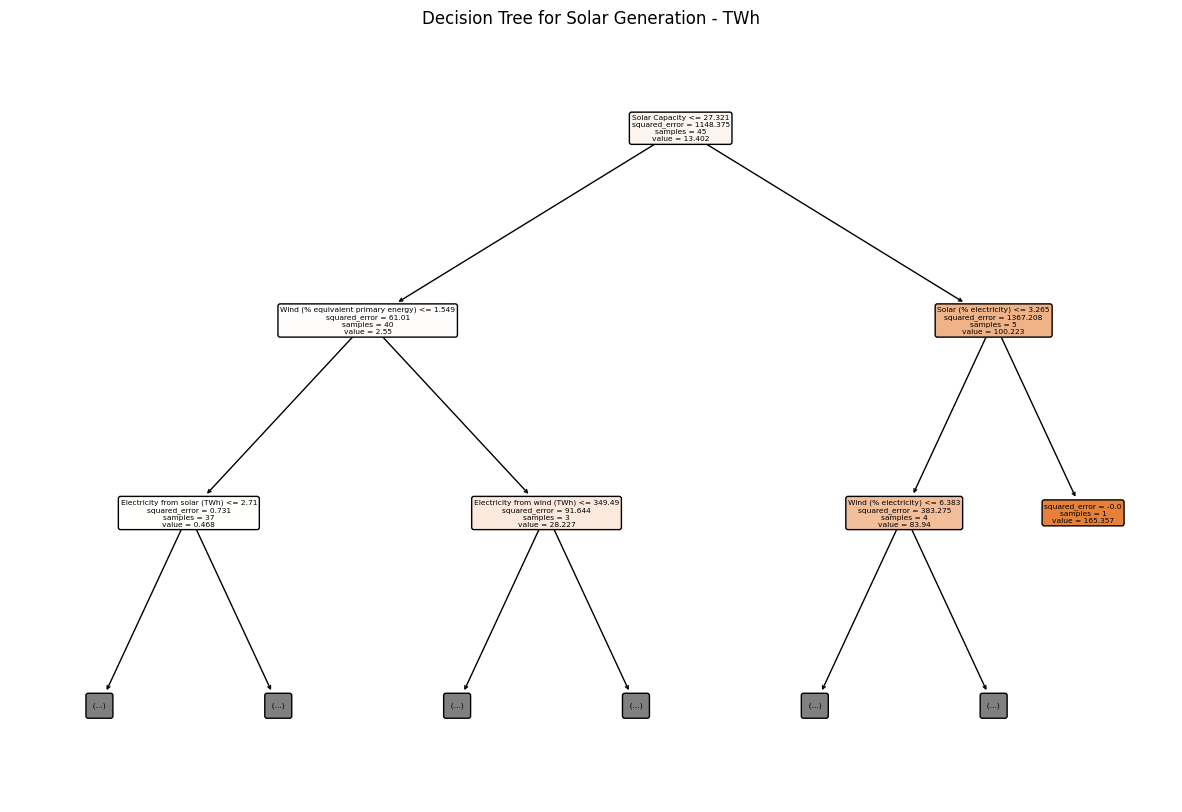

Root Mean Squared Error for Wind Generation - TWh: 17.831545823219322


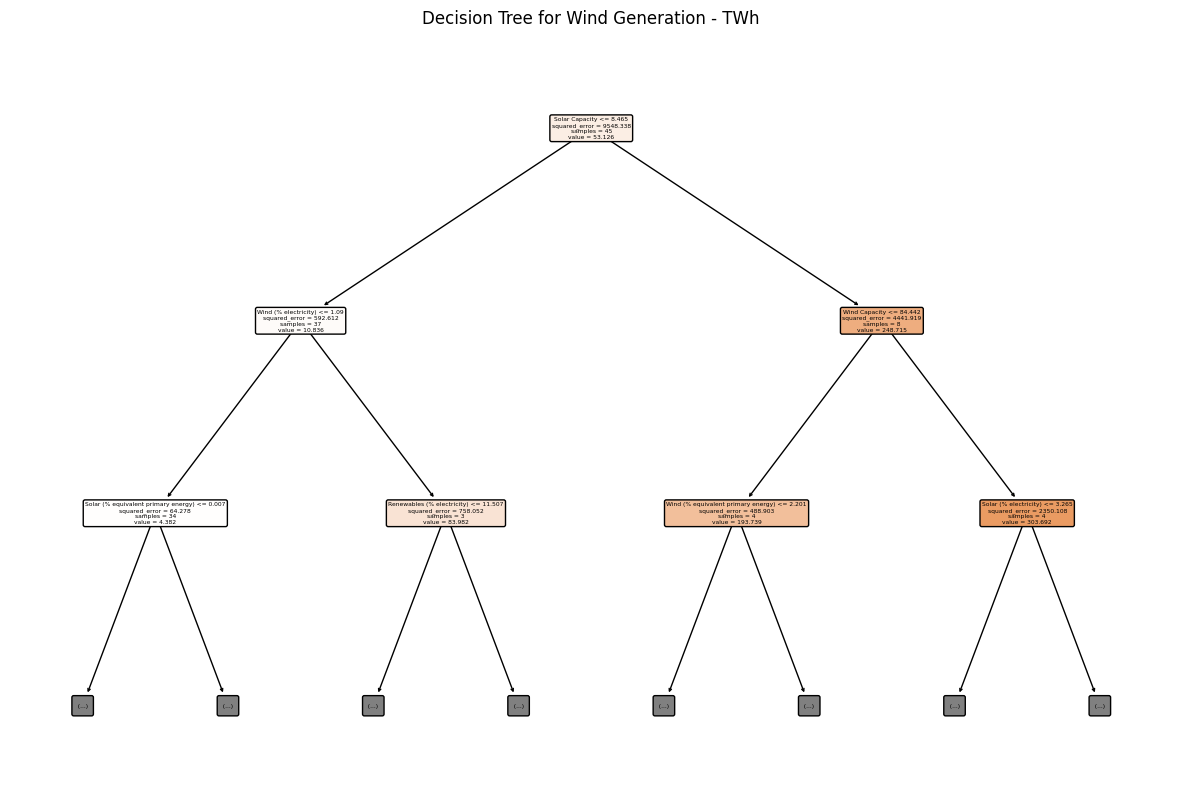

Root Mean Squared Error for Hydro Generation - TWh: 3.19834858513343


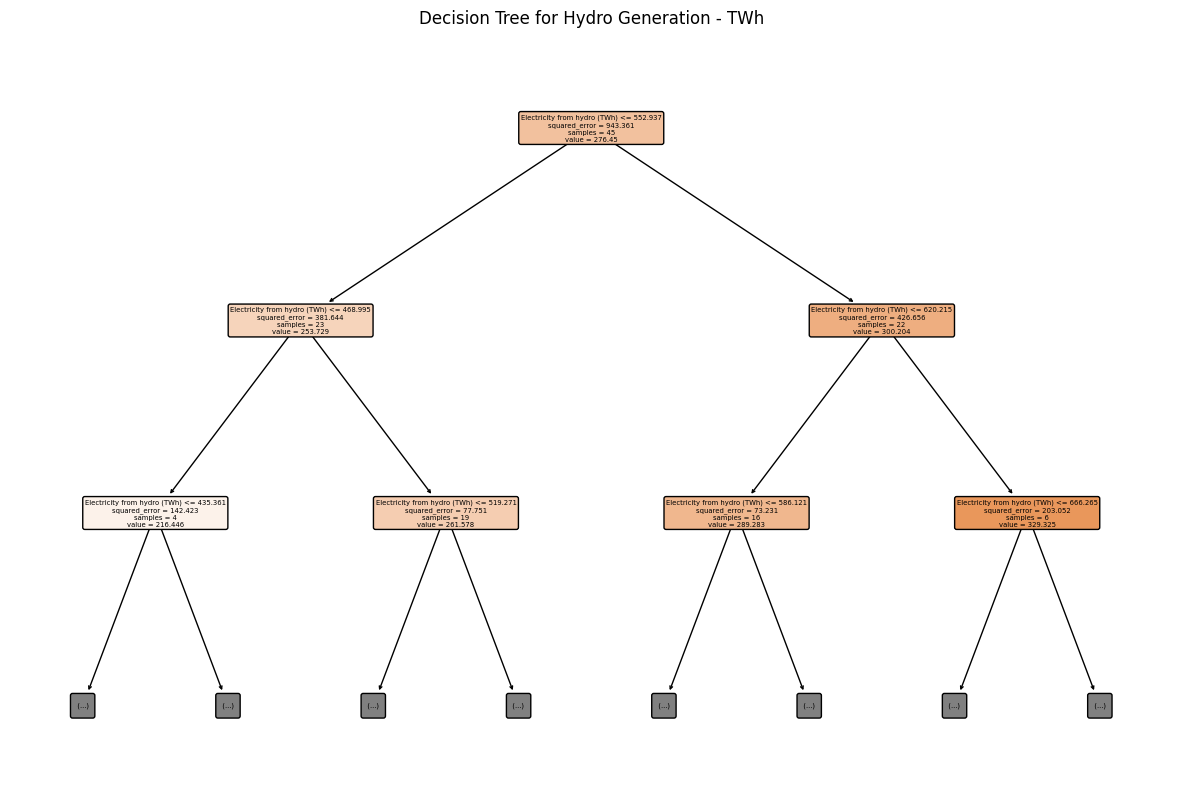

In [13]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# List of target variables
targets = ['Solar Generation - TWh', 'Wind Generation - TWh', 'Hydro Generation - TWh']

for target in targets:
    # Drop the target variable from the features
    X = df_usa.drop(target, axis=1)
    y = df_usa[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a decision tree regressor and fit it to the training data
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = regressor.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f'Root Mean Squared Error for {target}: {rmse}')

    # Plot the decision tree
    plt.figure(figsize=(15,10))
    plot_tree(regressor, filled=True, rounded=True, feature_names=X.columns, max_depth=2)
    plt.title(f'Decision Tree for {target}')
    plt.show()

Root Mean Squared Error for Solar Generation - TWh: 9.840284899517995


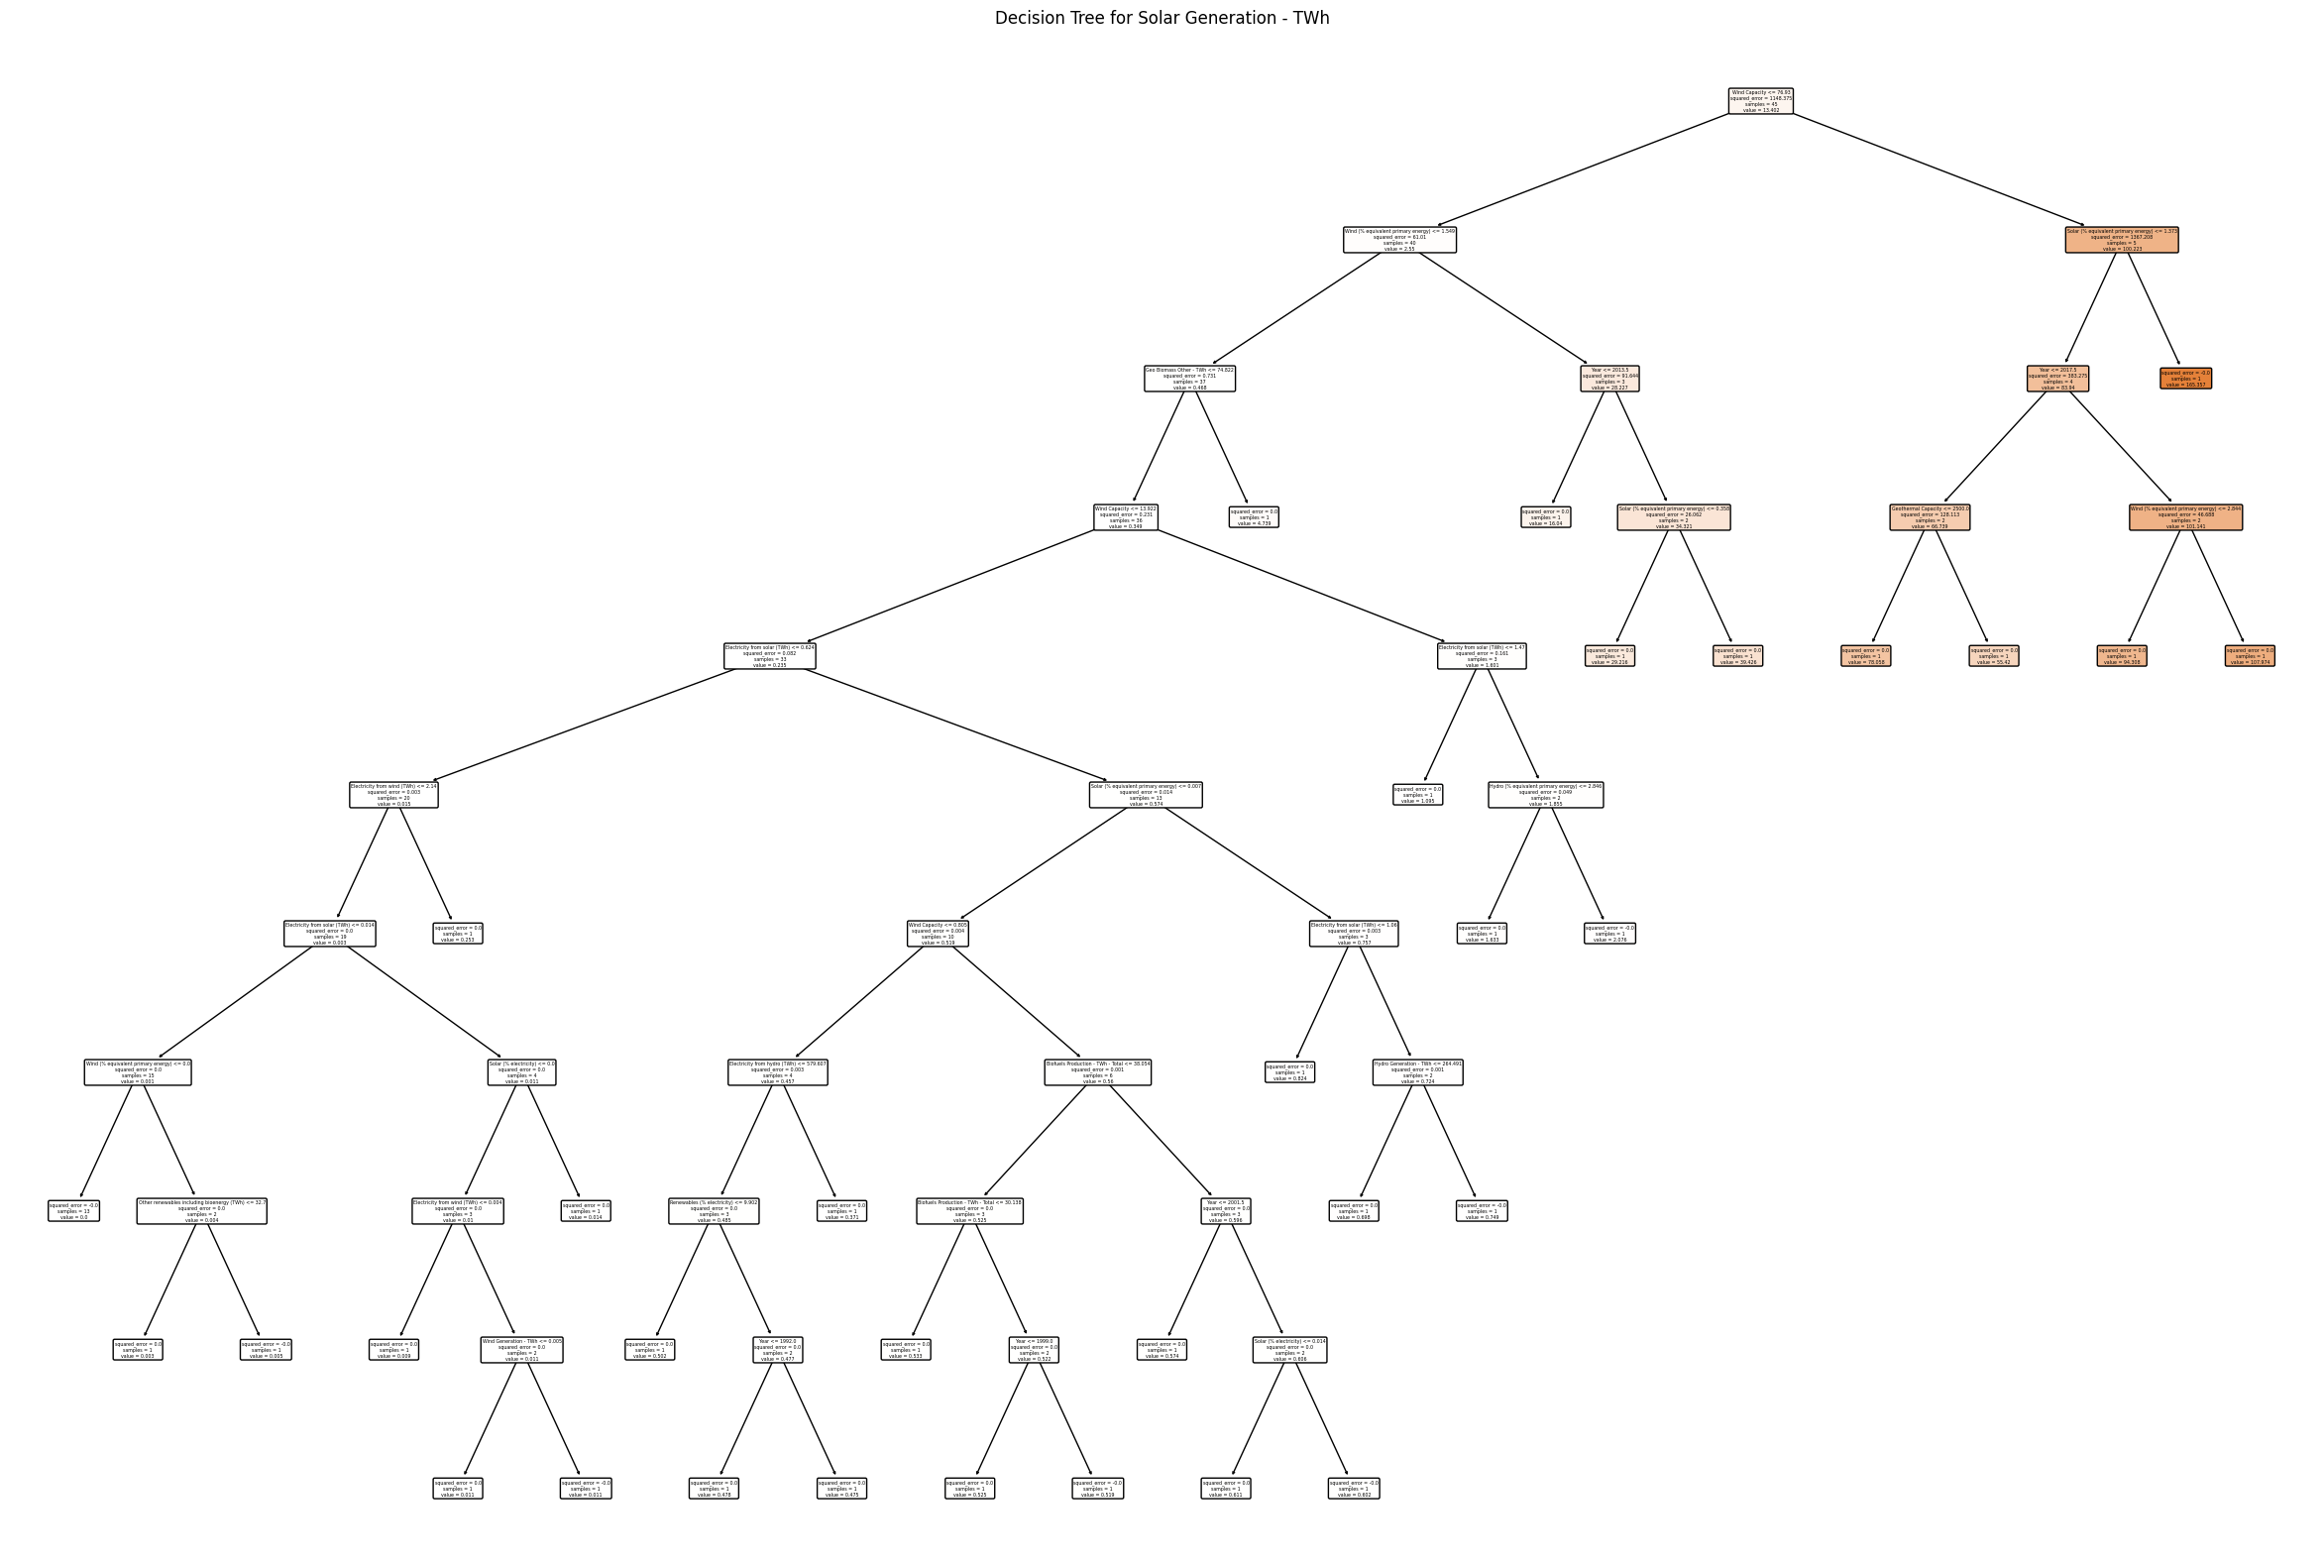

Root Mean Squared Error for Wind Generation - TWh: 15.786489514153498


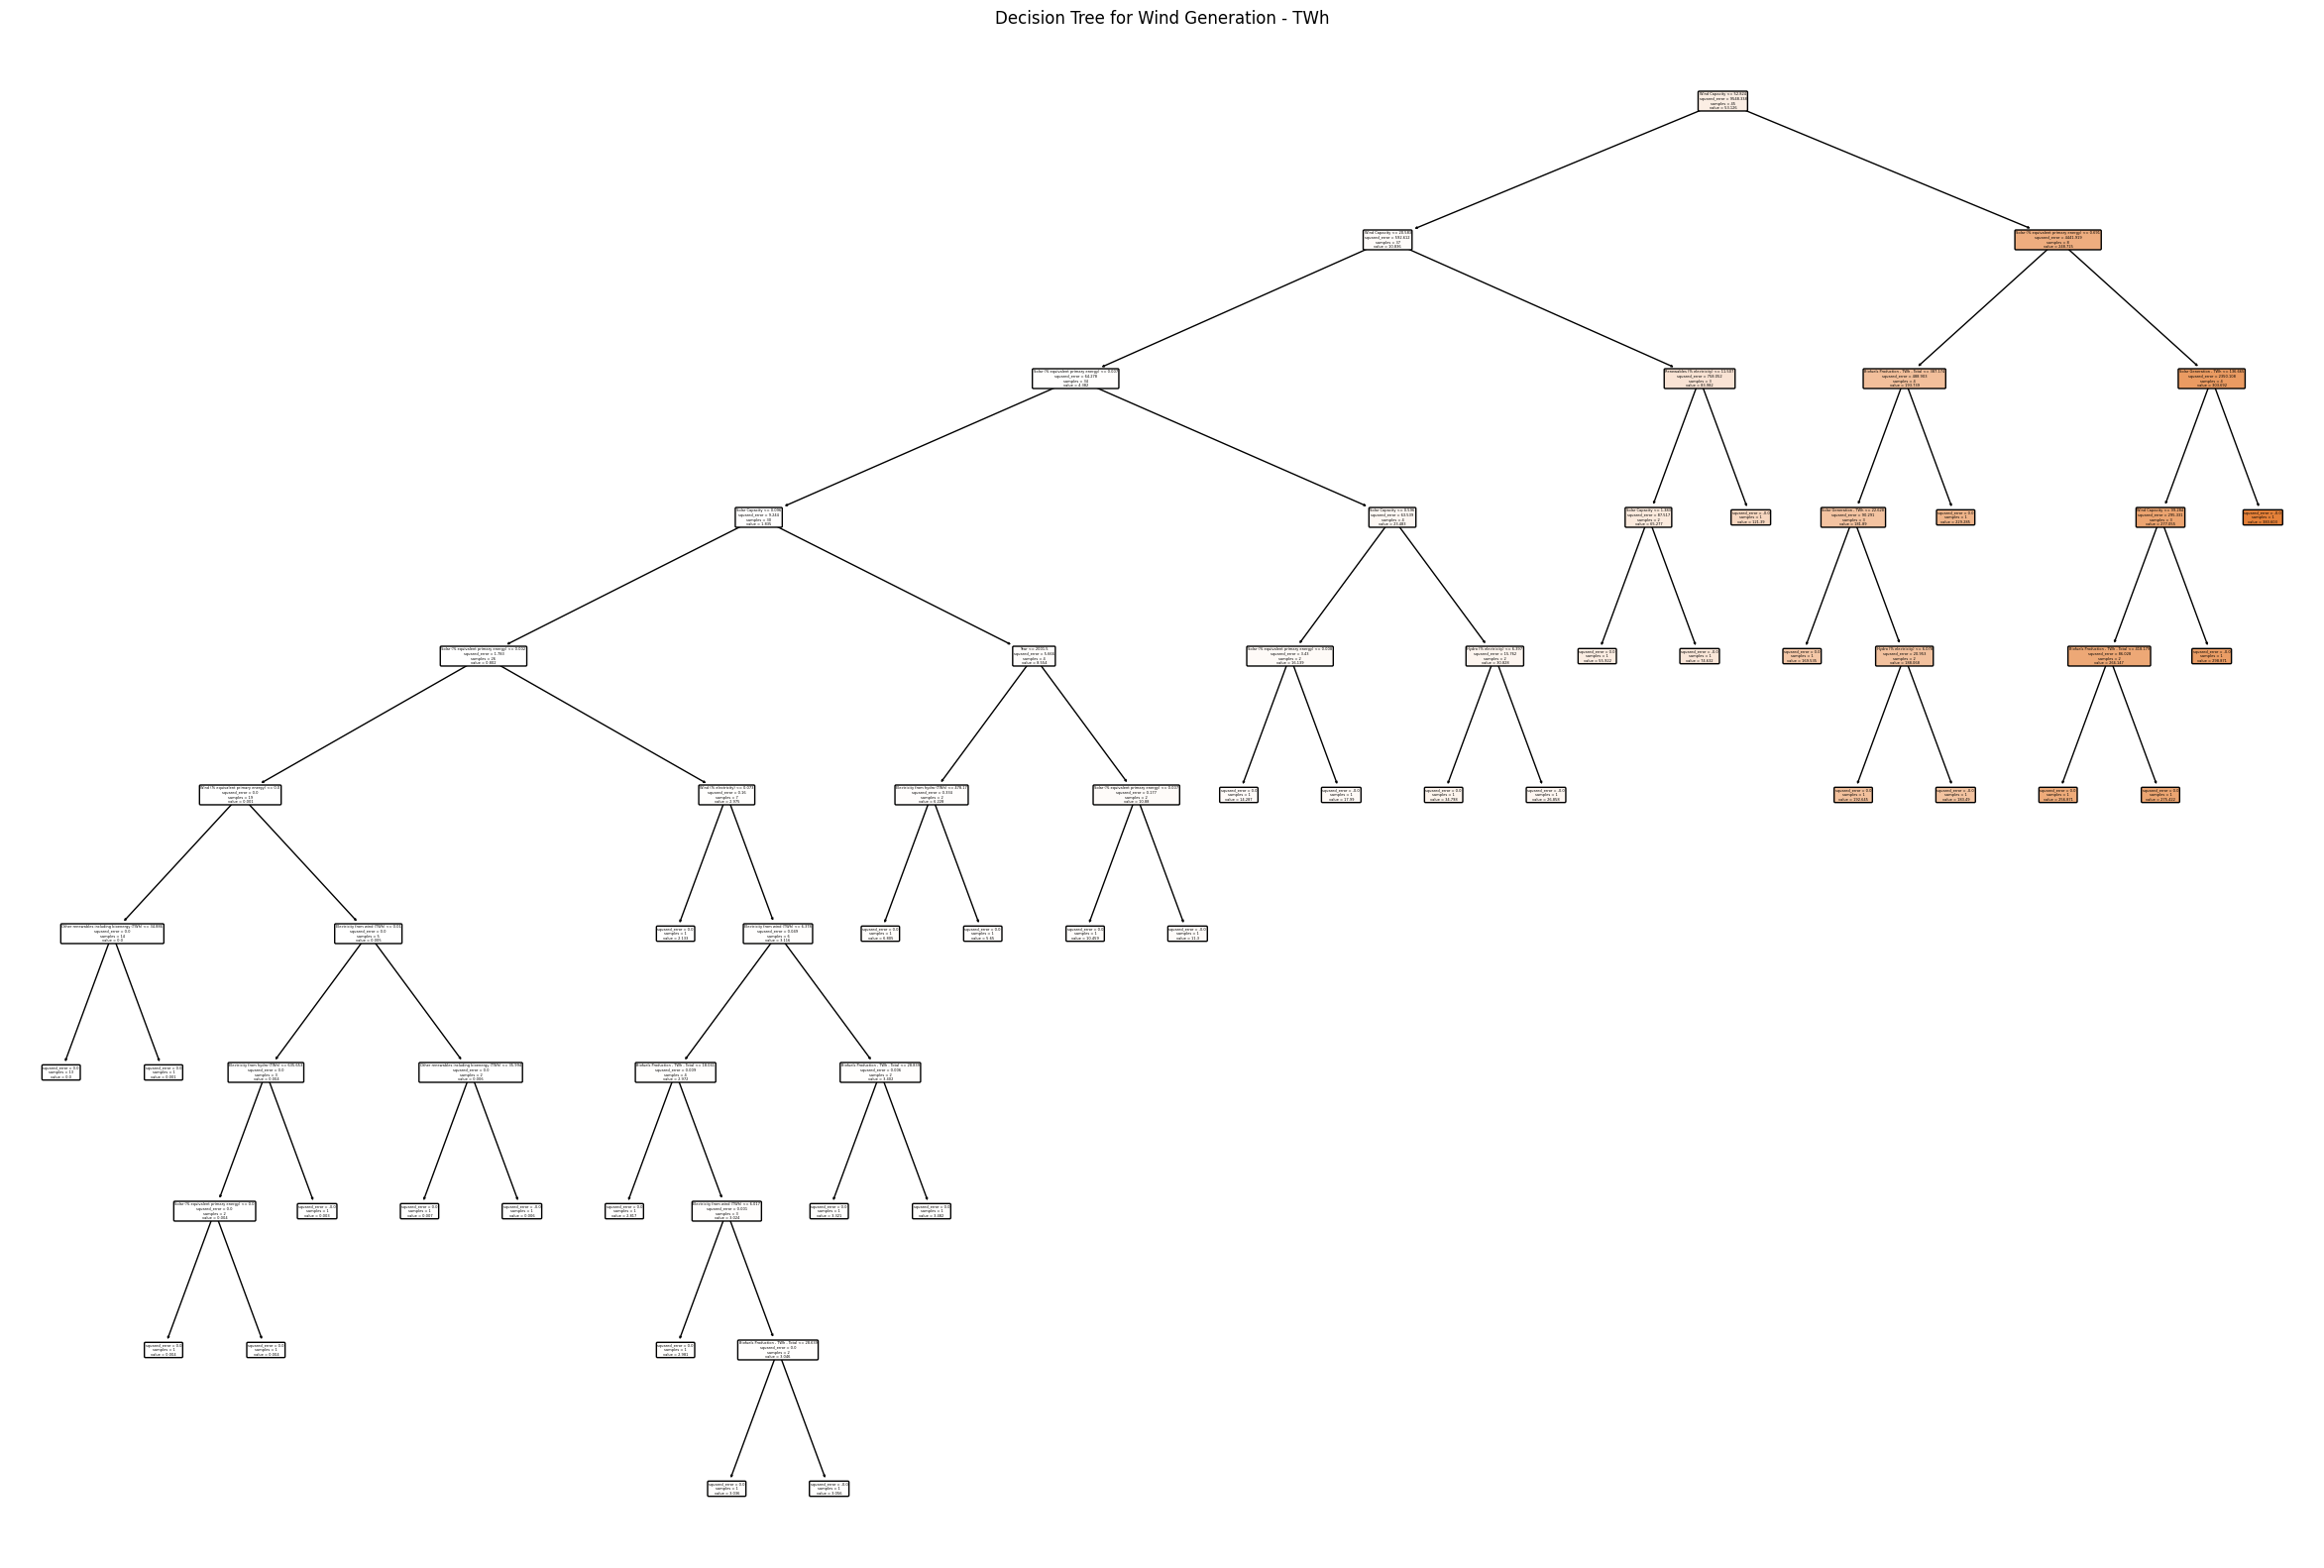

Root Mean Squared Error for Hydro Generation - TWh: 3.157962519868098


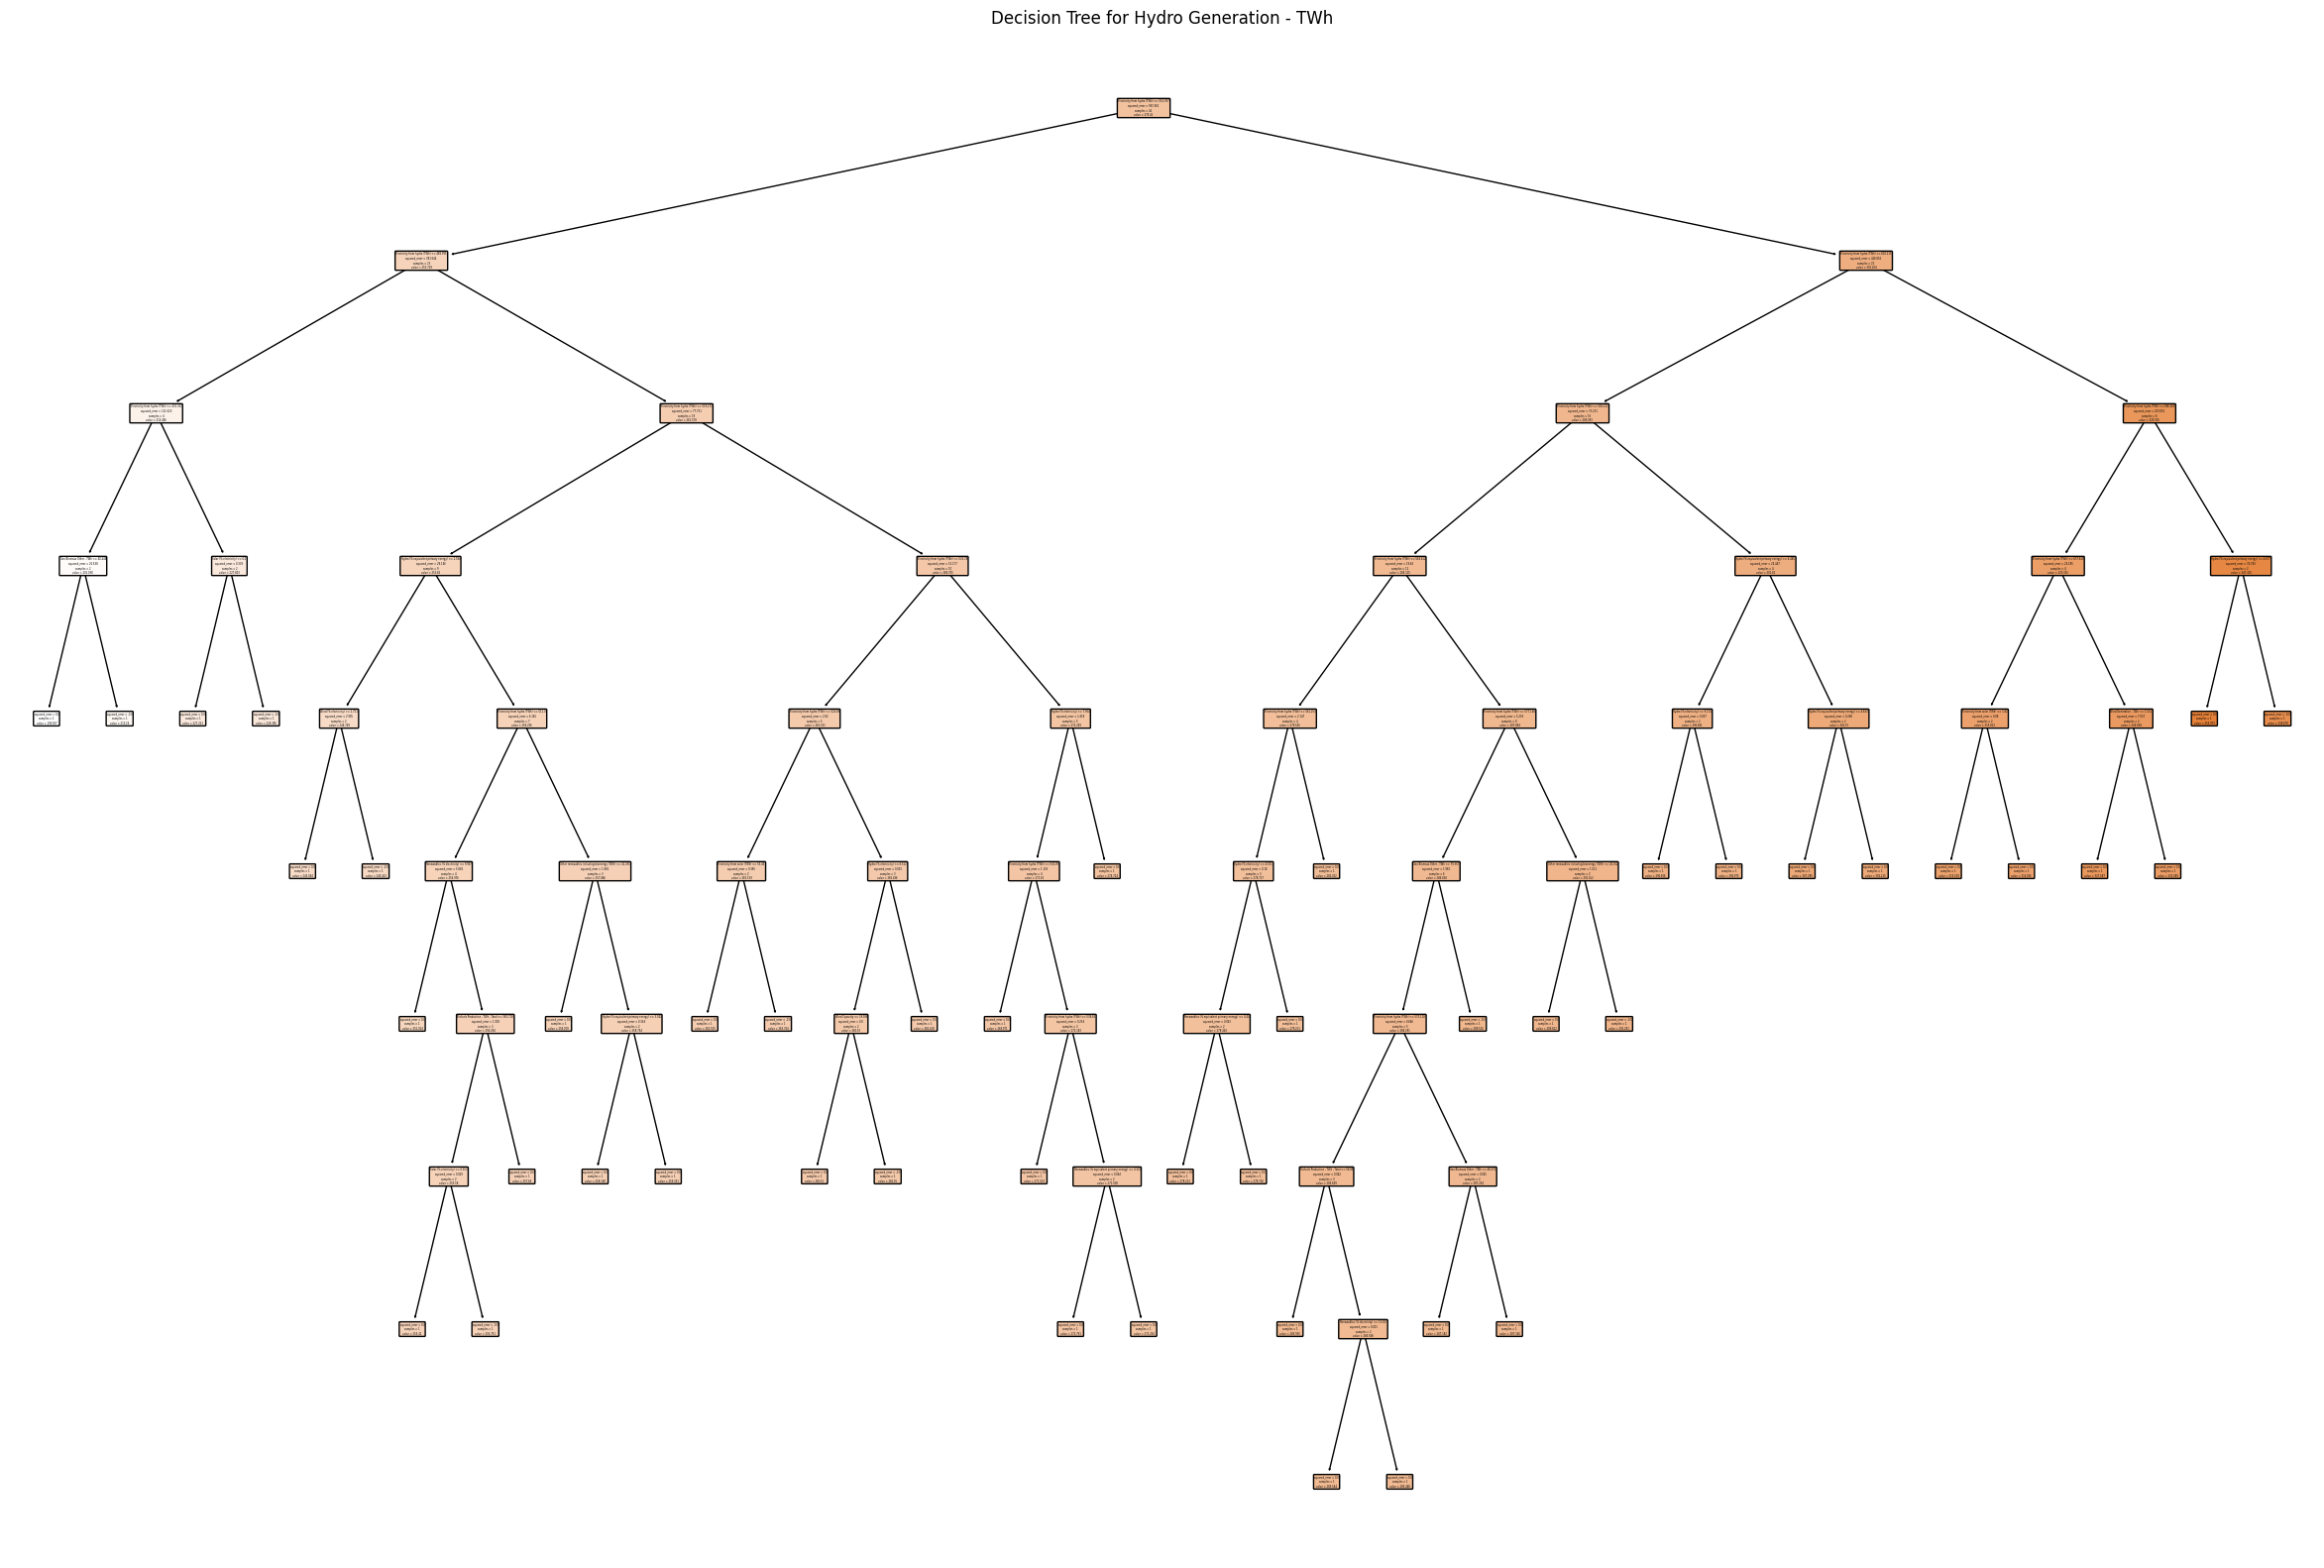

In [14]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of target variables
targets = ['Solar Generation - TWh', 'Wind Generation - TWh', 'Hydro Generation - TWh']

for target in targets:
    # Drop the target variable from the features
    X = df_usa.drop(target, axis=1)
    y = df_usa[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a decision tree regressor and fit it to the training data
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = regressor.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f'Root Mean Squared Error for {target}: {rmse}')

    # Plot the decision tree
    plt.figure(figsize=(30,20))
    plot_tree(regressor, filled=True, rounded=True, feature_names=X.columns)
    plt.title(f'Decision Tree for {target}')
    plt.show()